# importing libraries:

In [ ]:
!pip install transformers
!pip install datasets
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pyparsing/core.py", line 4114, in parseImpl
    return e._parse(
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pyparsing/core.py", line 821, in _parseNoCache
    loc, tokens = self.parseImpl(instring, pre_loc, doActions)
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pyparsing/core.py", line 2341, in parseImp

In [ ]:

pip install --upgrade gensim


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:


!pip install --upgrade torchtext


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import transformers
from datasets import load_dataset
from sklearn.model_selection import GridSearchCV, train_test_split
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string # for punctuation
from nltk.stem import WordNetLemmatizer # for lemmetization
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.svm import SVC
import re
from google.colab import files
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from joblib import dump,load
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import torch
import torch.nn as nn
from transformers import DistilBertModel, DistilBertTokenizer, AdamW
import torch
import torch.nn as nn
from transformers import DistilBertModel, DistilBertTokenizer, AdamW
from datasets import load_dataset

In [ ]:

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
model_filepath = "/content/drive/MyDrive/NLP_coursework/saved_models/"

#Reading Data

In [ ]:
# mounting google drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# reading the data
data= pd.read_csv('/content/drive/MyDrive/NLP_coursework/IMDB Dataset.csv')

# EDA and basic statistics

In [ ]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
# basic statistics
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


<Axes: xlabel='sentiment', ylabel='count'>

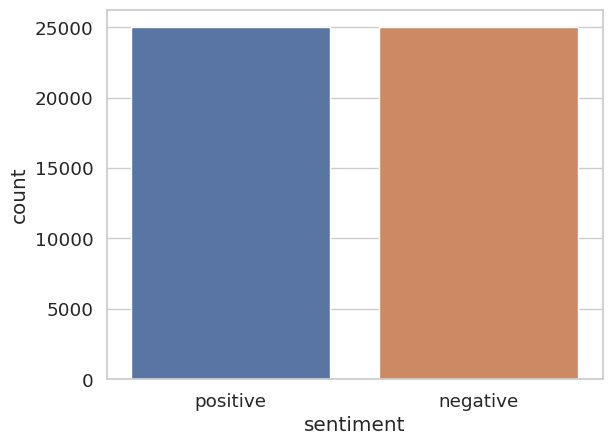

In [ ]:
# checking if the data is balanced
sns.set(style = "whitegrid" , font_scale = 1.2)
sns.countplot(x=data['sentiment'])

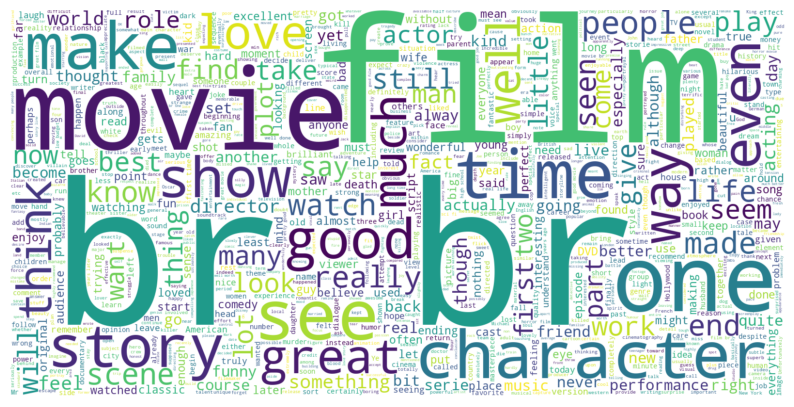

In [ ]:
# creating the word cloud for both classes to see the most frequent words in positive and negative reviews

# Setting figure size
plt.figure(figsize=(10, 10))

# Positive Review Text
positive_reviews = data[data.sentiment == 'positive'].review.values
positive_text = " ".join(positive_reviews)

# Creating word cloud object
wc = WordCloud(
    max_words=1000,
    width=1600,
    height=800,
    background_color='white',  # Setting background color
).generate(positive_text)

# Displaying the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

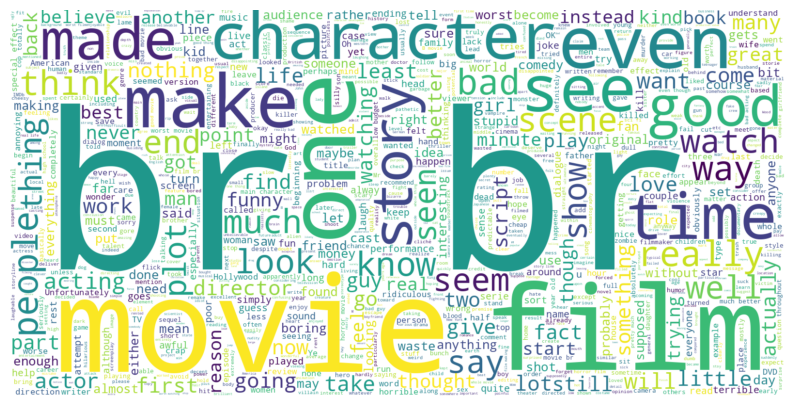

In [ ]:
# Setting figure size
plt.figure(figsize=(10, 10))

# negative Review Text
negative_reviews = data[data.sentiment == 'negative'].review.values
negative_text = " ".join(negative_reviews)

# Creating word cloud object
wc = WordCloud(
    max_words=1000,
    width=1600,
    height=800,
    background_color='white',  # Setting background color
).generate(negative_text)

# Displaying the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

232.84932
229.46456


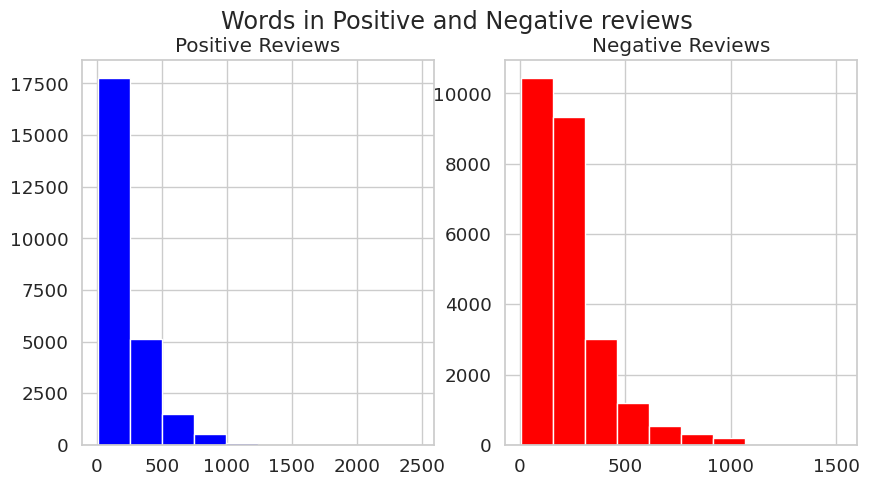

In [ ]:
# number of words in the positive and negative reviews:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=data[data['sentiment']=='positive']['review'].str.split().map(lambda x: len(x))
print(text_len.mean())
ax1.hist(text_len,color='blue')
ax1.set_title('Positive Reviews')
text_len=data[data['sentiment']=='negative']['review'].str.split().map(lambda x: len(x))
print(text_len.mean())
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in Positive and Negative reviews')
plt.show()

# Data preprocessing

In [ ]:
# replacing the text lables with zero and one
data.sentiment.replace("positive" , 1 , inplace = True)
data.sentiment.replace("negative" , 0 , inplace = True)
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
# removing html tags
def remove_html_tags(text):
    re_html = re.compile('<.*?>')
    return re_html.sub(r'', text)
data['processed_review'] = data['review'].apply(remove_html_tags)
data['processed_review']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. The filming tec...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: processed_review, Length: 50000, dtype: object

In [ ]:
# tokenization

# Defining a tokenization function
def tokenize(text):
    return word_tokenize(text)

# Applying the function
data['processed_review'] = data['processed_review'].apply(tokenize)

print(data)

                                                  review  sentiment  \
0      One of the other reviewers has mentioned that ...          1   
1      A wonderful little production. <br /><br />The...          1   
2      I thought this was a wonderful way to spend ti...          1   
3      Basically there's a family where a little boy ...          0   
4      Petter Mattei's "Love in the Time of Money" is...          1   
...                                                  ...        ...   
49995  I thought this movie did a down right good job...          1   
49996  Bad plot, bad dialogue, bad acting, idiotic di...          0   
49997  I am a Catholic taught in parochial elementary...          0   
49998  I'm going to have to disagree with the previou...          0   
49999  No one expects the Star Trek movies to be high...          0   

                                        processed_review  
0      [One, of, the, other, reviewers, has, mentione...  
1      [A, wonderful, little,

In [ ]:
# lower casing the tokens:

data['processed_review'] = data['processed_review'].apply(lambda x: [token.lower() for token in x])
data

,review,sentiment,processed_review
0,One of the other reviewers has mentioned that ...,1,"[one, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,1,"[a, wonderful, little, production, ., the, fil..."
2,I thought this was a wonderful way to spend ti...,1,"[i, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,0,"[basically, there, 's, a, family, where, a, li..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,"[petter, mattei, 's, ``, love, in, the, time, ..."
...,...,...,...
49995,I thought this movie did a down right good job...,1,"[i, thought, this, movie, did, a, down, right,..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,"[bad, plot, ,, bad, dialogue, ,, bad, acting, ..."
49997,I am a Catholic taught in parochial elementary...,0,"[i, am, a, catholic, taught, in, parochial, el..."
49998,I'm going to have to disagree with the previou...,0,"[i, 'm, going, to, have, to, disagree, with, t..."


In [ ]:
# removing stopwords:

stop_words = set(stopwords.words('english'))
data['processed_review'] = data['processed_review'].apply(lambda x: [word for word in x if word not in stop_words])
data

,review,sentiment,processed_review
0,One of the other reviewers has mentioned that ...,1,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,A wonderful little production. <br /><br />The...,1,"[wonderful, little, production, ., filming, te..."
2,I thought this was a wonderful way to spend ti...,1,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,0,"[basically, 's, family, little, boy, (, jake, ..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,"[petter, mattei, 's, ``, love, time, money, ''..."
...,...,...,...
49995,I thought this movie did a down right good job...,1,"[thought, movie, right, good, job, ., n't, cre..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,"[bad, plot, ,, bad, dialogue, ,, bad, acting, ..."
49997,I am a Catholic taught in parochial elementary...,0,"[catholic, taught, parochial, elementary, scho..."
49998,I'm going to have to disagree with the previou...,0,"['m, going, disagree, previous, comment, side,..."


In [ ]:
# removing punctuations:

data['processed_review'] = data['processed_review'].apply(lambda x: [word for word in x if word not in string.punctuation])
data

,review,sentiment,processed_review
0,One of the other reviewers has mentioned that ...,1,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,A wonderful little production. <br /><br />The...,1,"[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,1,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,0,"[basically, 's, family, little, boy, jake, thi..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,"[petter, mattei, 's, ``, love, time, money, ''..."
...,...,...,...
49995,I thought this movie did a down right good job...,1,"[thought, movie, right, good, job, n't, creati..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,"[bad, plot, bad, dialogue, bad, acting, idioti..."
49997,I am a Catholic taught in parochial elementary...,0,"[catholic, taught, parochial, elementary, scho..."
49998,I'm going to have to disagree with the previou...,0,"['m, going, disagree, previous, comment, side,..."


In [ ]:
# regular expressions

data['processed_review'] = data['processed_review'].apply(lambda x: [word for word in x if re.match("^[A-Za-z0-9_-]*$", word)])
data

,review,sentiment,processed_review
0,One of the other reviewers has mentioned that ...,1,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,A wonderful little production. <br /><br />The...,1,"[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,1,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,0,"[basically, family, little, boy, jake, thinks,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,"[petter, mattei, love, time, money, visually, ..."
...,...,...,...
49995,I thought this movie did a down right good job...,1,"[thought, movie, right, good, job, creative, o..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,"[bad, plot, bad, dialogue, bad, acting, idioti..."
49997,I am a Catholic taught in parochial elementary...,0,"[catholic, taught, parochial, elementary, scho..."
49998,I'm going to have to disagree with the previou...,0,"[going, disagree, previous, comment, side, mal..."


In [ ]:
# some of the punctuations were not removed, so we crete our own list
punc_word = ['"',"''"
,';'
,'-'
,'&'
,'%'
,'^'
,'$'
,'#'
,'@'
,';'
,'\\'
,"'"
,'`'
,'.'
,'...']
data['processed_review'] = data['processed_review'].apply(lambda x: [word for word in x if word not in punc_word])
data

,review,sentiment,processed_review
0,One of the other reviewers has mentioned that ...,1,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,A wonderful little production. <br /><br />The...,1,"[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,1,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,0,"[basically, family, little, boy, jake, thinks,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,"[petter, mattei, love, time, money, visually, ..."
...,...,...,...
49995,I thought this movie did a down right good job...,1,"[thought, movie, right, good, job, creative, o..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,"[bad, plot, bad, dialogue, bad, acting, idioti..."
49997,I am a Catholic taught in parochial elementary...,0,"[catholic, taught, parochial, elementary, scho..."
49998,I'm going to have to disagree with the previou...,0,"[going, disagree, previous, comment, side, mal..."


In [ ]:
# stemming the tokens

stemmer = PorterStemmer()

data['processed_review'] = data['processed_review'].apply(lambda x: [stemmer.stem(word) for word in x])
data

,review,sentiment,processed_review
0,One of the other reviewers has mentioned that ...,1,"[one, review, mention, watch, 1, oz, episod, h..."
1,A wonderful little production. <br /><br />The...,1,"[wonder, littl, product, film, techniqu, unass..."
2,I thought this was a wonderful way to spend ti...,1,"[thought, wonder, way, spend, time, hot, summe..."
3,Basically there's a family where a little boy ...,0,"[basic, famili, littl, boy, jake, think, zombi..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,"[petter, mattei, love, time, money, visual, st..."
...,...,...,...
49995,I thought this movie did a down right good job...,1,"[thought, movi, right, good, job, creativ, ori..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,"[bad, plot, bad, dialogu, bad, act, idiot, dir..."
49997,I am a Catholic taught in parochial elementary...,0,"[cathol, taught, parochi, elementari, school, ..."
49998,I'm going to have to disagree with the previou...,0,"[go, disagre, previou, comment, side, maltin, ..."


In [ ]:
# lemmetization
def simple_lemmatizer(text):
    lemmatizer = nltk.WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text
lemmatizer = nltk.WordNetLemmatizer()
data['processed_review'] = data['processed_review'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
data

,review,sentiment,processed_review
0,One of the other reviewers has mentioned that ...,1,"[one, review, mention, watch, 1, oz, episod, h..."
1,A wonderful little production. <br /><br />The...,1,"[wonder, littl, product, film, techniqu, unass..."
2,I thought this was a wonderful way to spend ti...,1,"[thought, wonder, way, spend, time, hot, summe..."
3,Basically there's a family where a little boy ...,0,"[basic, famili, littl, boy, jake, think, zombi..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,"[petter, mattei, love, time, money, visual, st..."
...,...,...,...
49995,I thought this movie did a down right good job...,1,"[thought, movi, right, good, job, creativ, ori..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,"[bad, plot, bad, dialogu, bad, act, idiot, dir..."
49997,I am a Catholic taught in parochial elementary...,0,"[cathol, taught, parochi, elementari, school, ..."
49998,I'm going to have to disagree with the previou...,0,"[go, disagre, previou, comment, side, maltin, ..."


# splitting the data


In [ ]:
X = data['processed_review']
y = data['sentiment']

# splitting into trainval and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True) # spliting the data into 20% test and 80% train

# changing the tokens into sentences so that we can apply logistic regression
X_train_new = list(map(lambda s: " ".join(s), X_train))
X_test_new = list(map(lambda s: " ".join(s), X_test))

In [ ]:
X_train

39087    [kept, ask, mani, fight, scream, match, swear,...
30893    [watch, entir, movi, could, watch, entir, movi...
45278    [touch, love, stori, reminisc, mood, love, dra...
16398    [latter-day, fulci, schlocker, total, abysm, c...
13653    [first, firmli, believ, norwegian, movi, conti...
                               ...                        
11284    [shadow, magic, recaptur, joy, amaz, first, mo...
44732    [found, movi, quit, enjoy, fairli, entertain, ...
38158    [avoid, one, terribl, movi, excit, pointless, ...
860      [product, quit, surpris, absolut, love, obscur...
15795    [decent, movi, although, littl, bit, short, ti...
Name: processed_review, Length: 40000, dtype: object

# logisitic regression + TFIDF

In [ ]:
X_train_new[0]

'kept ask mani fight scream match swear gener mayhem permeat 84 minut comparison also stand think one-dimension charact littl depth virtual imposs care happen badli written cypher director hang multicultur belief topic done much better drama tv must confess realli one spot bad perform film must said nichola burley heroin slutti best friend wasim zakir nasti bulli brother absolut terribl know act school graduat appli full refund post hast samina awan lead role manag impress cast so-cal british talent probabl never hear least hope next time hire differ intrigu thought hideous fashion soundtrack featur like snow patrol ian brown kean bit music fan familiar artist output recognis track movi apart omnipres run b-side anyon get mani mani music montag telegraph suppos feel accompani startlingli origin imag coupl kiss swollen lake canoodl doorway problem none song convey mood effici realis director lack abil carri emot journey audienc storytel dialogu end presum meant dessert everybodi get com

In [ ]:
X_test_new[0]

'realli like summerslam due look arena curtain look overal interest reason anyway could one best summerslam ever wwf lex luger main event yokozuna time ok huge fat man v strong man glad time chang terribl main event like everi match luger terribl match card razor ramon v ted dibias steiner brother v heavenli bodi shawn michael v curt hene event shawn name big monster bodi guard diesel ir v 1-2-3 kid bret hart first take doink take jerri lawler stuff hart lawler alway interest ludvig borga destroy marti jannetti undertak took giant gonzalez anoth terribl match smoke gunn tatanka took bam bam bigelow headshrink yokozuna defend world titl lex luger match bore terribl end howev deserv'

In [ ]:
# applying tfidf:

#Tfidf vectorizer
TFIDF=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
TFIDF_train=TFIDF.fit_transform(X_train_new)
#transformed test reviews
TFIDF_test=TFIDF.transform(X_test_new)
print('Tfidf_train:',TFIDF_train.shape)
print('Tfidf_test:',TFIDF_test.shape)


Tfidf_train: (40000, 5724587)
Tfidf_test: (10000, 5724587)


In [ ]:
# building the logistic regression model
LR=LogisticRegression(penalty='l2',max_iter=1000,C=1,random_state=42)
LR_TFIDF=LR.fit(TFIDF_train,y_train)
print(LR_TFIDF)

LogisticRegression(C=1, max_iter=1000, random_state=42)


In [ ]:
# saving the model:
dump(LR_TFIDF,'LR_TFIDF.joblib')

['LR_TFIDF.joblib']

In [ ]:
# train accuracy:
train_acc = LR_TFIDF.score(TFIDF_train, y_train)
print("Train accuracy: ", train_acc)

Train accuracy:  0.996325


In [ ]:
# checking on the test set:
pred=LR.predict(TFIDF_test)
print(pred)

lr_tfidf_score=accuracy_score(pred,y_test)
print("test_accuracy :",lr_tfidf_score)

[1 1 1 ... 1 0 0]
test_accuracy : 0.7392


In [ ]:
y_test.value_counts()[0]

4961

In [ ]:
lr_tfidf_report=classification_report(y_test,pred,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.72      0.77      0.75      4961
    Negative       0.76      0.71      0.73      5039

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



# SVM + TFIDF

In [ ]:
svc = SVC(kernel='sigmoid')
svc.fit(TFIDF_train, y_train)

SVC(kernel='sigmoid')

In [ ]:
# saving the model:
dump(svc,'svm_TFIDF.joblib')

['svm_TFIDF.joblib']

In [ ]:
# train accuracy
train_acc = svc.score(TFIDF_train, y_train)
print("Train accuracy: ", train_acc)

Train accuracy:  0.996325


In [ ]:
pred=svc.predict(TFIDF_test)
print(pred)

svm_tfidf_score=accuracy_score(pred,y_test)
print("test_accuracy :",svm_tfidf_score)

[1 0 0 ... 0 0 0]
test_accuracy : 0.5317


In [ ]:
svm_tfidf_report=classification_report(y_test,pred,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.51      1.00      0.68      4961
    Negative       0.97      0.07      0.14      5039

    accuracy                           0.53     10000
   macro avg       0.74      0.54      0.41     10000
weighted avg       0.75      0.53      0.40     10000



# logistic regression + word2vec

In [ ]:
# Training a Word2Vec model on the tokenized reviews:
w2v_model = Word2Vec(X_train, vector_size=100, window=5, min_count=1, workers=4)

# Computing the average word vector for each review:
def get_vector(tokens):
    vec = np.zeros((100,))
    count = 0
    for word in tokens:
        if word in w2v_model.wv.key_to_index:
            vec += w2v_model.wv[word]
            count += 1
    if count != 0:
        vec /= count
    return vec

# Generating the train and test embeddings
x_train_w2v = [get_vector(tokens) for tokens in X_train]
x_test_w2v = [get_vector(tokens) for tokens in X_test]


In [ ]:
# Training a logistic regression model:
LR_W2V = LogisticRegression(max_iter=1000)
LR_W2V.fit(x_train_w2v, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
# saving the model:
dump(LR_W2V,'LR_W2V.joblib')

In [ ]:
# Make predictions on both train and test sets:
y_train_pred = LR_W2V.predict(x_train_w2v)
y_test_pred = LR_W2V.predict(x_test_w2v)


In [ ]:
# Computing the train and test accuracies:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)


In [ ]:
# classification report
report = classification_report(y_test, y_test_pred)

print(f"Train accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print("Classification report:")
print(report)

Train accuracy: 0.8583
Test accuracy: 0.8518
Classification report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4961
           1       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



# SVM + word2vec

In [ ]:
svc_W2V = SVC(kernel='sigmoid')
svc_W2V.fit(x_train_w2v, y_train)

SVC(kernel='sigmoid')

In [ ]:
dump(svc_W2V,'svc_W2V.joblib')

In [ ]:
# Make predictions on both train and test sets:
y_train_pred = svc_W2V.predict(x_train_w2v)
y_test_pred = svc_W2V.predict(x_test_w2v)


In [ ]:
# Computing the train and test accuracies:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)


In [ ]:
# classification report
report = classification_report(y_test, y_test_pred)

print(f"Train accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print("Classification report:")
print(report)

Train accuracy: 0.6788
Test accuracy: 0.6820
Classification report:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      4961
           1       0.69      0.68      0.68      5039

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



# logistic regression + Countvectorizer


In [ ]:
# Vectorize the train and test data using count vectorization
countV = CountVectorizer()
X_train_cv = countV.fit_transform(X_train_new)
X_test_cv = countV.transform(X_test_new)


In [ ]:
# Train a logistic regression model
LR_CV = LogisticRegression(random_state=42)
LR_CV.fit(X_train_cv, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
dump(LR_CV, model_filepath + 'LR_CV.joblib')

['/content/drive/MyDrive/NLP_coursework/saved_models/LR_CV.joblib']

In [ ]:
# Get the train and test accuracies
y_train_pred = LR_CV.predict(X_train_cv)
train_acc = accuracy_score(y_train, y_train_pred)

y_test_pred = LR_CV.predict(X_test_cv)
test_acc = accuracy_score(y_test, y_test_pred)


In [ ]:
# Print the train and test accuracies and classification report
print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print(classification_report(y_test, y_test_pred))

Train accuracy: 0.98665
Test accuracy: 0.8785
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4961
           1       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



# SVM + Countvectorizer

In [ ]:
svc_CV = SVC(kernel='sigmoid')
svc_CV.fit(X_train_cv, y_train)

SVC(kernel='sigmoid')

In [ ]:
dump(svc_CV,'svc_CV.joblib')

In [ ]:
# Make predictions on both train and test sets:
y_train_pred = svc_CV.predict(X_train_cv)
y_test_pred = svc_CV.predict(X_test_cv)

In [ ]:
# Computing the train and test accuracies:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

In [ ]:
# classification report
report = classification_report(y_test, y_test_pred)

print(f"Train accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print("Classification report:")
print(report)

Train accuracy: 0.7038
Test accuracy: 0.7059
Classification report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      4961
           1       0.71      0.71      0.71      5039

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



In [ ]:
!pip install --upgrade torch

In [ ]:
!pip install torchtext


#  LSTM + Glove

In [ ]:
X_train_new=pd.DataFrame(X_train_new)

# Glove embedding

In [ ]:
# creating a vocabulary
def create_corpus_tk(df):
  corpus = []
  for text in X_train_new[0]:
    words = [word for word in word_tokenize(text)]
    corpus.append(words)
  return corpus


In [ ]:
corpus = create_corpus_tk(X_train_new)
corpus


[['kept',
  'ask',
  'mani',
  'fight',
  'scream',
  'match',
  'swear',
  'gener',
  'mayhem',
  'permeat',
  '84',
  'minut',
  'comparison',
  'also',
  'stand',
  'think',
  'one-dimension',
  'charact',
  'littl',
  'depth',
  'virtual',
  'imposs',
  'care',
  'happen',
  'badli',
  'written',
  'cypher',
  'director',
  'hang',
  'multicultur',
  'belief',
  'topic',
  'done',
  'much',
  'better',
  'drama',
  'tv',
  'must',
  'confess',
  'realli',
  'one',
  'spot',
  'bad',
  'perform',
  'film',
  'must',
  'said',
  'nichola',
  'burley',
  'heroin',
  'slutti',
  'best',
  'friend',
  'wasim',
  'zakir',
  'nasti',
  'bulli',
  'brother',
  'absolut',
  'terribl',
  'know',
  'act',
  'school',
  'graduat',
  'appli',
  'full',
  'refund',
  'post',
  'hast',
  'samina',
  'awan',
  'lead',
  'role',
  'manag',
  'impress',
  'cast',
  'so-cal',
  'british',
  'talent',
  'probabl',
  'never',
  'hear',
  'least',
  'hope',
  'next',
  'time',
  'hire',
  'differ',
  'i

In [ ]:
for text in  X_train_new:
  print(text)

0


In [ ]:
num_words = len(corpus) # size of the corpus
print(num_words)


40000


In [ ]:
# mean of the length od the sentences in both positive and negative reviews is almost 230
max_len = 230

In [ ]:
tokenizer= Tokenizer(num_words = 560000)

In [ ]:
tokenizer.fit_on_texts(X_train_new[0])

In [ ]:
training_seq = tokenizer.texts_to_sequences(X_train_new[0])

In [ ]:
X_train_Glove = pad_sequences(training_seq,maxlen = max_len,truncating = 'post', padding = 'post')

X_train_Glove

array([[714, 363,  43, ...,   0,   0,   0],
       [ 11, 266,   1, ...,   0,   0,   0],
       [433,  27,  14, ...,   0,   0,   0],
       ...,
       [591,   3, 279, ...,   0,   0,   0],
       [207,  97, 268, ...,   0,   0,   0],
       [454,   1, 193, ...,   0,   0,   0]], dtype=int32)

In [ ]:
X_test = pd.DataFrame(X_test_new)
X_test

,0
0,realli like summerslam due look arena curtain ...
1,mani televis show appeal quit mani differ kind...
2,film quickli get major chase scene ever increa...
3,jane austen would definit approv one gwyneth p...
4,expect somewhat high went see movi thought ste...
...,...
9995,although casper van dien michael rooker gener ...
9996,like movi realli sure start watch enjoy noneth...
9997,ye non-singaporean ca see big deal film refer ...
9998,far film go likabl enough entertain charact go...


In [ ]:
test_seq = tokenizer.texts_to_sequences(X_test[0])
X_test_Glove = pad_sequences(test_seq,maxlen = max_len,truncating = 'post', padding = 'post')
X_test_Glove

array([[   15,     4, 27995, ...,     0,     0,     0],
       [   43,   619,    19, ...,     0,     0,     0],
       [    2,   841,    10, ...,     0,     0,     0],
       ...,
       [  389,   624, 14974, ...,     0,     0,     0],
       [  143,     2,    23, ...,     0,     0,     0],
       [  129,  5838,    47, ...,     0,     0,     0]], dtype=int32)

In [ ]:
w_idx = tokenizer.word_index
w_idx # unique word dictionary
len(w_idx) #lenght of unique words

67200

In [ ]:
# building the embedding dict
embedding_dict = {}
with open ("/content/drive/MyDrive/NLP_coursework/glove.twitter.27B.100d.txt","r") as f :
  for line in f :
    values = line.split()
    word = values[0]
    vectors = np.asarray(values[1:], "float32")
    embedding_dict[word] = vectors
f.close()


In [ ]:

word_count = len(w_idx) + 1
embedding_matrix = np.zeros((word_count, 100))
for word, i in w_idx.items():
  if i < word_count :
    emb_vec = embedding_dict.get(word)
    if emb_vec is not None :
      embedding_matrix[i] = emb_vec


In [ ]:
w_idx['movie']
embedding_dict.get('movie')
(embedding_matrix[38288] == embedding_dict.get('movie')).all()

False

In [ ]:
print(X_train_Glove.shape ,y_train.shape)
print(X_test_Glove.shape,y_test.shape)

(40000, 230) (40000,)
(10000, 230) (10000,)


In [ ]:
# saving x,y Glove:
dump(X_train_Glove,'X_train_Glove.joblib')
dump(X_test_Glove,'X_test_Glove.joblib')

['X_test_Glove.joblib']

In [ ]:
from keras.layers import LSTM
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM

In [ ]:
# model architecture
# input_length= input vector dimention which is 230
# number 100 is output vector dimension
lstm=Sequential()
embedding_layer=Embedding(word_count,100,weights=[embedding_matrix],input_length=max_len,trainable=False)
lstm.add(embedding_layer)
lstm.add(LSTM(128))
lstm.add(Dropout(0.2)) # Adding a Dropout layer with a rate of 0.2
lstm.add(Dense(1,activation='sigmoid'))

In [ ]:
lstm.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
print(lstm.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 230, 100)          6720100   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 6,837,477
Trainable params: 117,377
Non-trainable params: 6,720,100
_________________________________________________________________
None


In [ ]:
# training the model:
lstm_history=lstm.fit(X_train_Glove,y_train,batch_size=128,epochs=6,verbose=1,validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 11s 12ms/step - loss: 0.6896 - acc: 0.5234 - val_loss: 0.6919 - val_acc: 0.5105
Epoch 2/6
250/250 [==============================] - 2s 10ms/step - loss: 0.6881 - acc: 0.5278 - val_loss: 0.6922 - val_acc: 0.5102
Epoch 3/6
250/250 [==============================] - 2s 10ms/step - loss: 0.6948 - acc: 0.5141 - val_loss: 0.6929 - val_acc: 0.5119
Epoch 4/6
250/250 [==============================] - 3s 11ms/step - loss: 0.6933 - acc: 0.5123 - val_loss: 0.6921 - val_acc: 0.5116
Epoch 5/6
250/250 [==============================] - 3s 11ms/step - loss: 0.6916 - acc: 0.5113 - val_loss: 0.6908 - val_acc: 0.5150
Epoch 6/6
250/250 [==============================] - 3s 10ms/step - loss: 0.6886 - acc: 0.5184 - val_loss: 0.6981 - val_acc: 0.5035


In [ ]:
# saving the model
dump(lstm_history,model_filepath+'LSTM.joblib')

['/content/drive/MyDrive/NLP_coursework/saved_models/LSTM.joblib']

In [ ]:
lstm_history=load('LSTM.joblib')

FileNotFoundError: ignored

In [ ]:
# predicting on the test set:
score=lstm.evaluate(X_test_Glove,y_test,verbose=1)

313/313 [==============================] - 1s 5ms/step - loss: 0.6975 - acc: 0.5020


In [ ]:
# checking the model perfoemance:
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.6975045204162598
Test accuracy: 0.5019999742507935


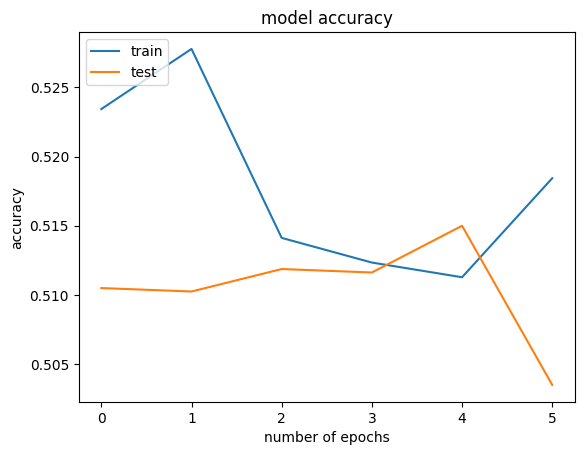

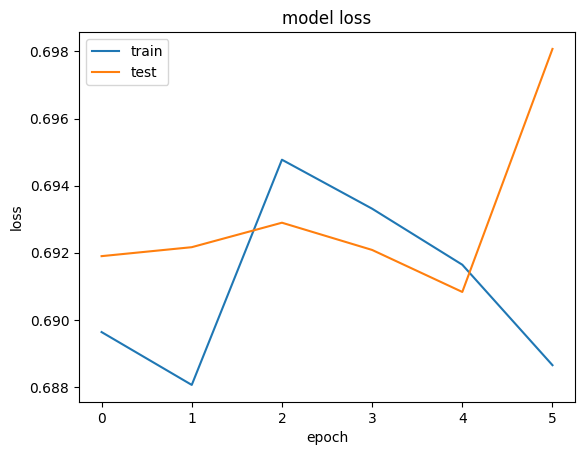

In [ ]:
# evaluation graphs:
plt.plot(lstm_history.history['acc'])
plt.plot(lstm_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('number of epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# LSTM + WORD2VEC

In [ ]:
# Update the input layer to use Word2Vec embeddings
# embedding_layer = Embedding(input_dim=len(w2v_model.wv.key_to_index)+1,
#                             output_dim=100,
#                             weights=[w2v_model.wv.vectors],
#                             input_length=max_len,
#                             trainable=False)

# # Create the LSTM model
# lstm = Sequential()
# lstm.add(embedding_layer)
# lstm.add(LSTM(128))
# lstm.add(Dropout(0.2))
# lstm.add(Dense(1, activation='sigmoid'))

# # Compile the model
# lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# print(lstm.summary())

# # Train the model
# lstm_history = lstm.fit(x_train_w2v, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

import numpy as np

embedding_matrix = np.concatenate((w2v_model.wv.vectors, np.zeros((1, 100))), axis=0)

embedding_layer = Embedding(input_dim=len(w2v_model.wv.key_to_index) + 1,
                            output_dim=100,
                            weights=[embedding_matrix],
                            input_length=max_len,
                            trainable=False)

# Create the LSTM model
lstm = Sequential()
lstm.add(embedding_layer)
lstm.add(LSTM(128))
lstm.add(Dropout(0.2))
lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(lstm.summary())




Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 230, 100)          8738700   
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 8,856,077
Trainable params: 117,377
Non-trainable params: 8,738,700
_________________________________________________________________
None
Epoch 1/6


ValueError: ignored

In [ ]:
# Train the model
lstm_history = lstm.fit(x_train_w2v, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

In [ ]:
# predicting on the test set:
score=lstm.evaluate(X_test_Glove,y_test,verbose=1)

In [ ]:
# checking the model perfoemance:
print('Test score:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# evaluation graphs:
plt.plot(lstm_history.history['acc'])
plt.plot(lstm_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('number of epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# logistic regression + Glove

In [ ]:
# Train a logistic regression model
LR_Glove = LogisticRegression(random_state=42)
LR_Glove.fit(X_train_Glove, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Get the train and test accuracies
y_train_pred = LR_Glove.predict(X_train_Glove)
train_acc = accuracy_score(y_train, y_train_pred)

y_test_pred = LR_Glove.predict(X_test_Glove)
test_acc = accuracy_score(y_test, y_test_pred)


In [ ]:
# Print the train and test accuracies and classification report
print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print(classification_report(y_test, y_test_pred))

Train accuracy: 0.525675
Test accuracy: 0.5106
              precision    recall  f1-score   support

           0       0.51      0.40      0.45      4961
           1       0.51      0.62      0.56      5039

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.50     10000
weighted avg       0.51      0.51      0.50     10000



# SVM + Glove

In [ ]:
svc_Glove = SVC(kernel='sigmoid')
svc_Glove.fit(X_train_Glove, y_train)

SVC(kernel='sigmoid')

In [ ]:
# Make predictions on both train and test sets:
y_train_pred = svc_Glove.predict(X_train_Glove)
y_test_pred = svc_Glove.predict(X_test_Glove)

In [ ]:
# Computing the train and test accuracies:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

In [ ]:
# classification report
report = classification_report(y_test, y_test_pred)

print(f"Train accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print("Classification report:")
print(report)

Train accuracy: 0.4946
Test accuracy: 0.4953
Classification report:
              precision    recall  f1-score   support

           0       0.49      0.45      0.47      4961
           1       0.50      0.54      0.52      5039

    accuracy                           0.50     10000
   macro avg       0.49      0.49      0.49     10000
weighted avg       0.49      0.50      0.49     10000



# BERT

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# New Section

In [ ]:
# Load the tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
bert_model = DistilBertModel.from_pretrained('distilbert-base-uncased')

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# splitting the data one more time for bert because we do not need preprocessed data
X1 = data['review']
y1 = data['sentiment']

# splitting into trainval and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42,shuffle=True) # spliting the data into 20% test and 80% train for bert

In [ ]:
X_train1 = X_train1.reset_index(drop=True)
y_train1 = y_train1.reset_index(drop=True)
X_test1 = X_test1.reset_index(drop=True)
y_test1 = y_test1.reset_index(drop=True)

In [ ]:
# Tokenize the data
def tokenize(batch):
    return tokenizer(batch, padding=True, truncation=True)

In [ ]:
# Create PyTorch datasets
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['label'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


In [ ]:
train_encodings = tokenize(X_train1.tolist())
test_encodings = tokenize(X_test1.tolist())

train_dataset = SentimentDataset(train_encodings, y_train1)
test_dataset = SentimentDataset(test_encodings, y_test1)

In [ ]:
# Set up the data loader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16)

In [ ]:
# Define the training loop
def train(model, train_loader, optimizer, loss_fn, device):
    model.train()
    loss_result = []
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = loss_fn(outputs, labels.float())
        loss_result.append(loss.item())
        loss.backward()
        optimizer.step()

    return np.array(loss_result).mean()

# Define the evaluation loop
def evaluate(model, test_loader, device):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)

            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask)
            predictions = torch.round(torch.sigmoid(outputs))

            total += labels.size(0)
            correct += (predictions == labels).sum().item()

    return correct / total

In [ ]:
class SentimentClassifier(nn.Module):
    def __init__(self, model):
        super(SentimentClassifier, self).__init__()
        self.model = model
        self.linear = nn.Linear(768, 1)

    def forward(self, input_ids, attention_mask):
        outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden_state = outputs.last_hidden_state[:, 0, :]
        logits = self.linear(last_hidden_state)
        return logits.squeeze(-1)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Train the model - DO NOT RUN THIS CELL
model = SentimentClassifier(bert_model)
model.to(device)

# Set up the optimizer and loss function
optimizer = AdamW(model.parameters(), lr=5e-5)
loss_fn = nn.BCEWithLogitsLoss()


losses = []
accuracies = []

for epoch in range(3):
    loss = train(model, train_loader, optimizer, loss_fn, device)
    losses.append(loss)
    print(loss)
    accuracy = evaluate(model, test_loader, device)
    accuracies.append(accuracy)
    print(f'Epoch {epoch+1} - Train Loss {loss:.3f} -Test Accuracy: {accuracy:.3f}')

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


0.24432756153605878
Epoch 1 - Train Loss 0.244 -Test Accuracy: 0.920
0.12896359553039075
Epoch 2 - Train Loss 0.129 -Test Accuracy: 0.926
0.07164471977301873
Epoch 3 - Train Loss 0.072 -Test Accuracy: 0.920


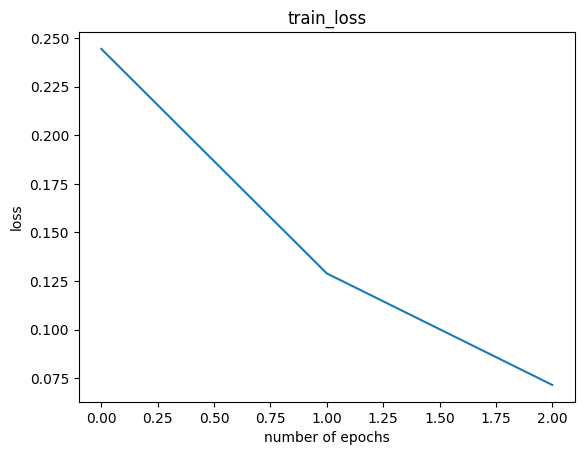

In [ ]:
plt.plot(losses)

plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('number of epochs')
plt.show()


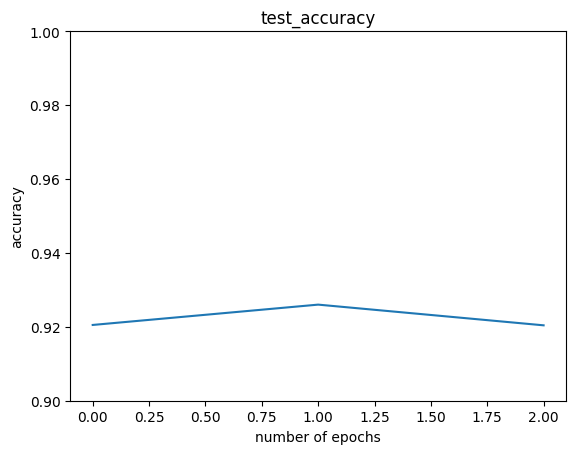

In [ ]:
plt.plot(accuracies)
plt.title('test_accuracy')
plt.ylabel('accuracy')
plt.ylim([0.90, 1])
plt.xlabel('number of epochs')
plt.show()


Save best model

In [ ]:
torch.save(model.state_dict(), model_filepath+"my_bert_model.pth")

In [ ]:
# Load the tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
bert_model = DistilBertModel.from_pretrained('distilbert-base-uncased')

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# splitting the data one more time for bert because we do not need preprocessed data
X1 = data['review']
y1 = data['sentiment']

# splitting into trainval and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42,shuffle=True) # spliting the data into 20% test and 80% train for bert

In [ ]:
X_train1 = X_train1.reset_index(drop=True)
y_train1 = y_train1.reset_index(drop=True)
X_test1 = X_test1.reset_index(drop=True)
y_test1 = y_test1.reset_index(drop=True)

In [ ]:
# Tokenize the data
def tokenize(batch):
    return tokenizer(batch, padding=True, truncation=True)

In [ ]:
# Create PyTorch datasets
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['label'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


In [ ]:
train_encodings = tokenize(X_train1.tolist())
test_encodings = tokenize(X_test1.tolist())

train_dataset = SentimentDataset(train_encodings, y_train1)
test_dataset = SentimentDataset(test_encodings, y_test1)

In [ ]:
# Set up the data loader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16)

In [ ]:
# Define the evaluation loop
def evaluate_model(model, test_loader, device):
    model.eval()
    predictions_list = []
    y_actuals_list = []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)

            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            y_actuals_list.extend(labels.tolist())

            outputs = model(input_ids, attention_mask)
            predictions = torch.round(torch.sigmoid(outputs))

            predictions_list.extend(predictions.tolist())

    return predictions_list, y_actuals_list

In [ ]:
predictions_list, y_actuals_list = evaluate_model(loaded_model, test_loader, device)

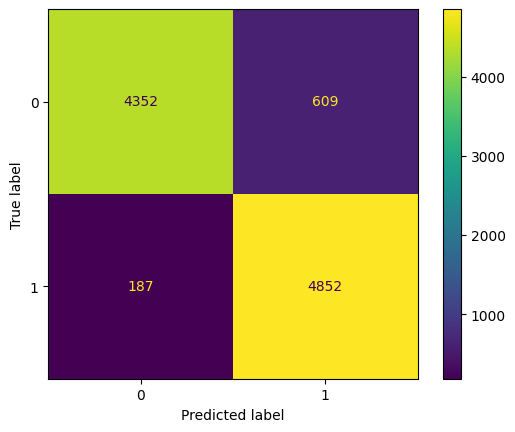

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_actuals_list, predictions_list, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_actuals_list, predictions_list))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      4961
           1       0.89      0.96      0.92      5039

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



# RUN this cell for testing the two Best Models

In [ ]:
# logistic regression+ countvectorizer model
LR_CV = load(model_filepath + 'LR_CV.joblib')

In [ ]:
# bert model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
loaded_model = SentimentClassifier(bert_model).to(device)
loaded_model.load_state_dict(torch.load(model_filepath+"my_bert_model.pth"))

NameError: ignored